In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, norm
 

sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(18,18))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

%matplotlib inline




# Load v2

In [2]:
sc.settings.figdir = "supp_fig4"

In [3]:
adata=sc.read_h5ad('/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_prurigo.h5ad')
adata
#adata_lesional.obs["lvl3_annotation_pred"].value_counts())

AnnData object with n_obs × n_vars = 6361 × 36601
    obs: 'sample_id', 'barcode', 'Patient_status', 'DonorID', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'QC_hi', 'QC_mid', 'Site_status_binary', 'leiden_res1', 'leiden_res0.5', 'test12', 'Mapping', 'cell_type_pred'
    uns: 'cell_type_pred_colors', 'leiden_res0.5', 'leiden_res1', 'neighbor_20', 'test12_colors', 'umap'
    obsm: 'X_scpoli', 'X_scvi', 'X_umap'
    layers: 'counts'
    obsp: 'neighbor_20_connectivities', 'neighbor_20_distances'

In [4]:
# # neighbor_id a= "neighbor_30"   
# # neighbor=30
# sc.pp.neighbors(adata_subset, use_rep = 'X_scvi', metric = "euclidean", n_neighbors=neighbor,key_added=neighbor_id)
# print("neighbours done")

# sc.tl.umap(full_latent, min_dist=MIN_DIST) #neighbors_key =neighbor_id) 
# print(f"UMAP done. Min dist {mindist}")


In [5]:
# {x:x for x in adata.obs["cell_type_pred"].unique()}

In [6]:
# RENAME = {'F6: Myofibroblast inflammatory': 'F6: Inflammatory myofibroblast',
#  'F4: DS_DPEP1+': 'F4: DS_DPEP1+',
#  'F1: EA-Regenerative':  'F1: Superficial',
#  'F1: Epithelium-associated': 'F1: Superficial',
#  'F3: FRC-like CCL19+': 'F3: FRC-like',
#  'F2: Universal': 'F2: Universal',
#  'F6: Myofibroblast': 'F7: Myofibroblast',
#  'F2/3: Bridge': 'F2/3: Perivascular',
#  'F5: RAMP1+': 'F5: RAMP1+',
#  'F5: NGFR+': 'F5: NGFR+',
#  'F4: TNN+COCH+': 'F4: TNN+COCH+',
#  'F4: DP_HHIP+': 'F4: DP_HHIP+'}

# adata.obs['cell_type_pred'] = adata.obs['cell_type_pred'].map(RENAME)

In [7]:
# custom_colors = {    'F1: Superficial': '#ffef5a',
#     'F2/3: Perivascular': '#364f99',
#     'F2: Universal': '#91bae2',
#     'F3: FRC-like': '#c6508f',
#     'F4: DP_HHIP+': '#c9efb4',
#     'F4: DS_DPEP1+': '#3d6f3b',
#     'F4: TNN+COCH+': '#00f273',
#     'F5: NGFR+': '#8981a7',
#     'F5: RAMP1+': '#4b2657',
#      'F6: Inflammatory myofibroblast': "#75fbfd",
#      'F7: Myofibroblast': "#2f6565",
#        'F8: Fascia-like myofibroblast': '#dd7465',
#  'F_Fascia': "#0000004D",
#                                }
# adata.obs["cell_type_pred"]=adata.obs["cell_type_pred"].astype('category')

# try:
#     adata.uns["cell_type_pred_colors"] = [custom_colors[cat] for cat in adata.obs["cell_type_pred"].cat.categories]
# except KeyError as e:
#     print(f"Error: Missing color for category {e}")

In [8]:
# adata.write('/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_prurigo.h5ad')


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


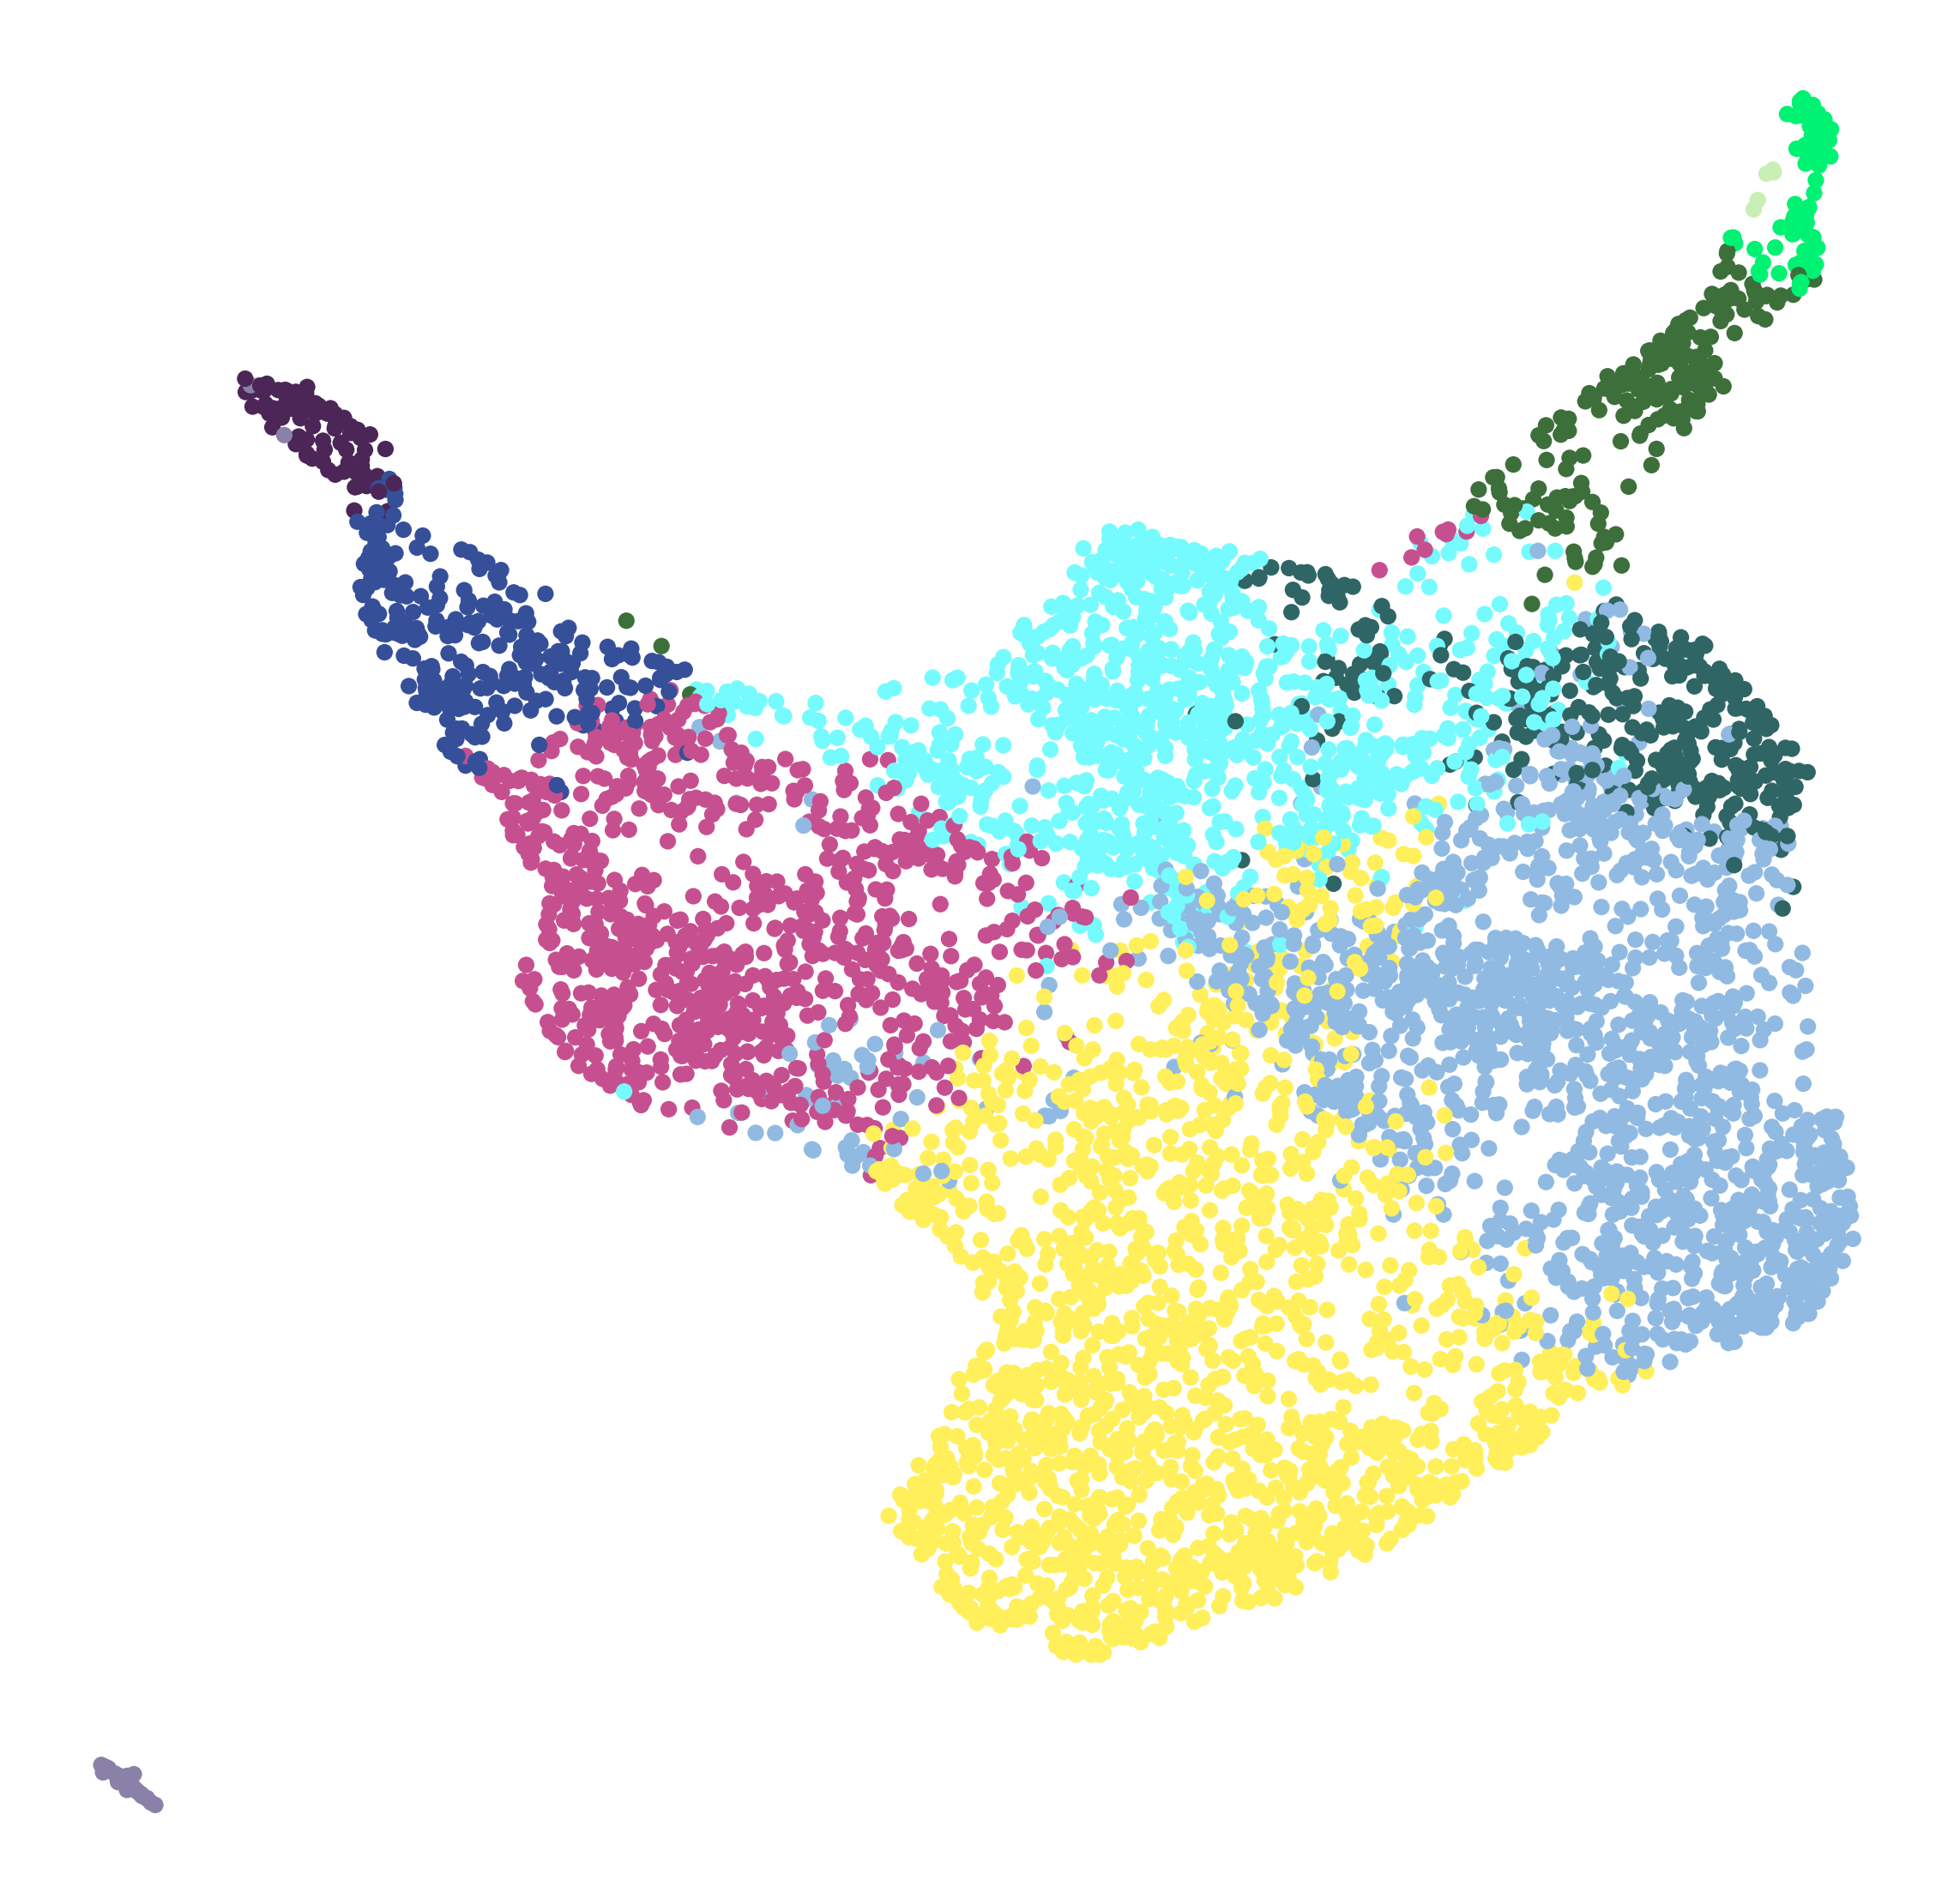

In [9]:
sc.pl.umap(
    adata,
    color='cell_type_pred',
    show=True,
    frameon=False,
    legend_loc=None,
    legend_fontsize=1,
    s=300,
    title='',
    legend_fontoutline=2,
    save="supp4c.pdf"
)

In [10]:
import pickle

pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'

with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)





In [11]:
import pickle

pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'

with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)



file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

with open(file_path, 'rb') as file:
    LESIONAL_GENES_VSHORT5 = pickle.load(file)

 



In [19]:
NEW_ORDER = [

 'F1: Superficial', 

 'F2: Universal','F2/3: Perivascular',
 'F3: FRC-like',

 'F4: DS_DPEP1+',
 'F4: TNN+COCH+',
 'F4: DP_HHIP+',
           'F5: RAMP1+',
 'F5: NGFR+',  
            'F6: Inflammatory myofibroblast',
     'F7: Myofibroblast',
    
            ]

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

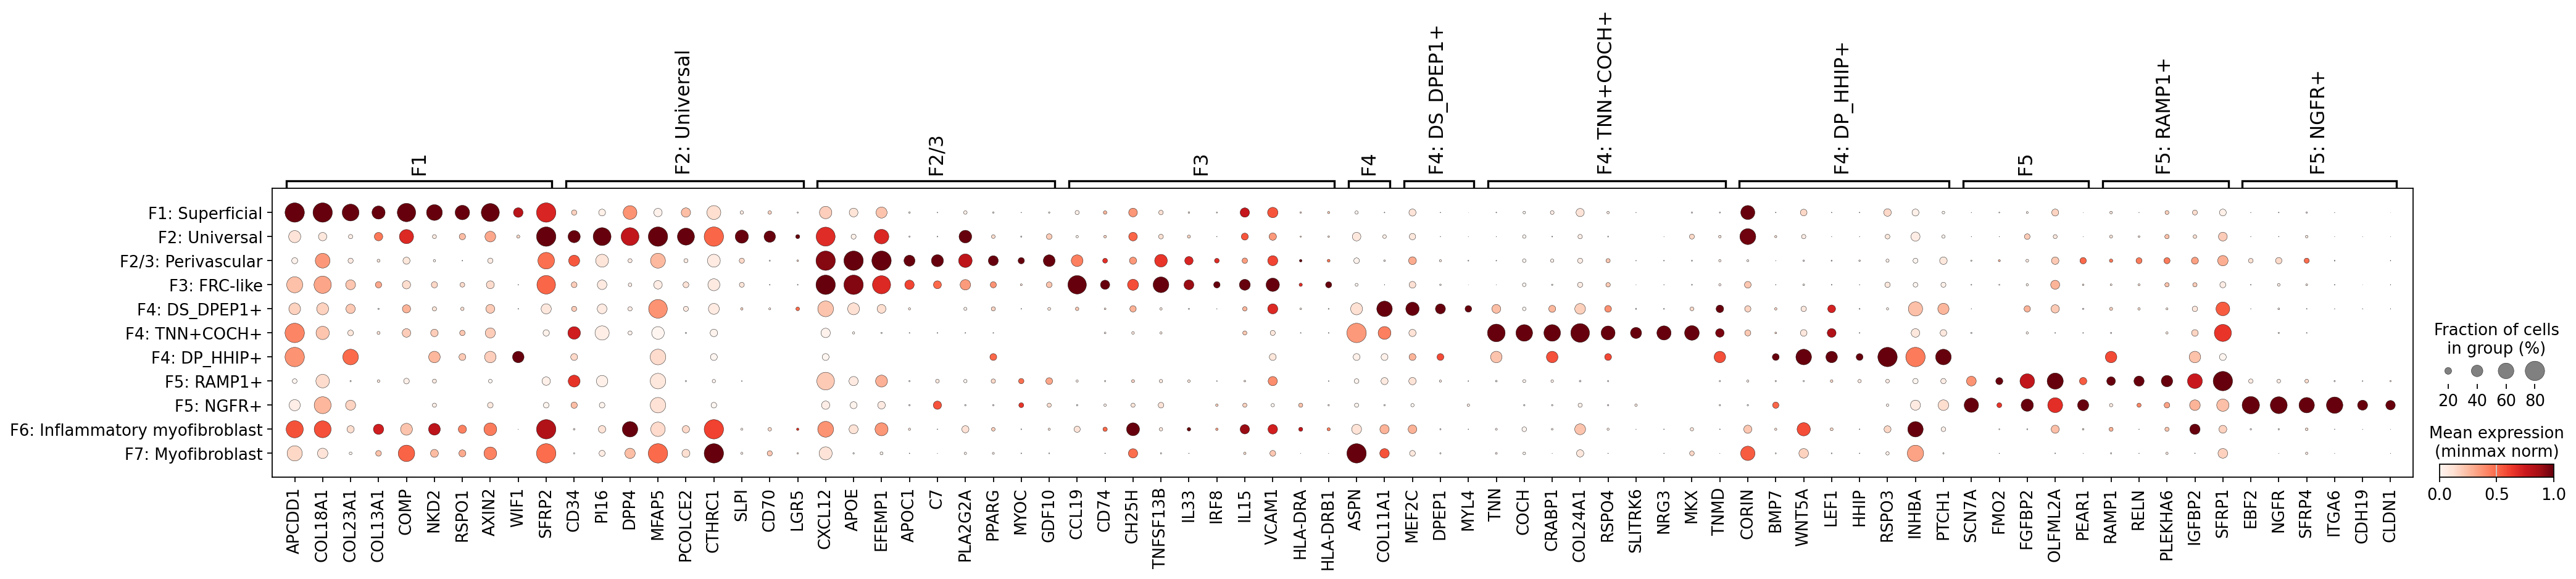

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

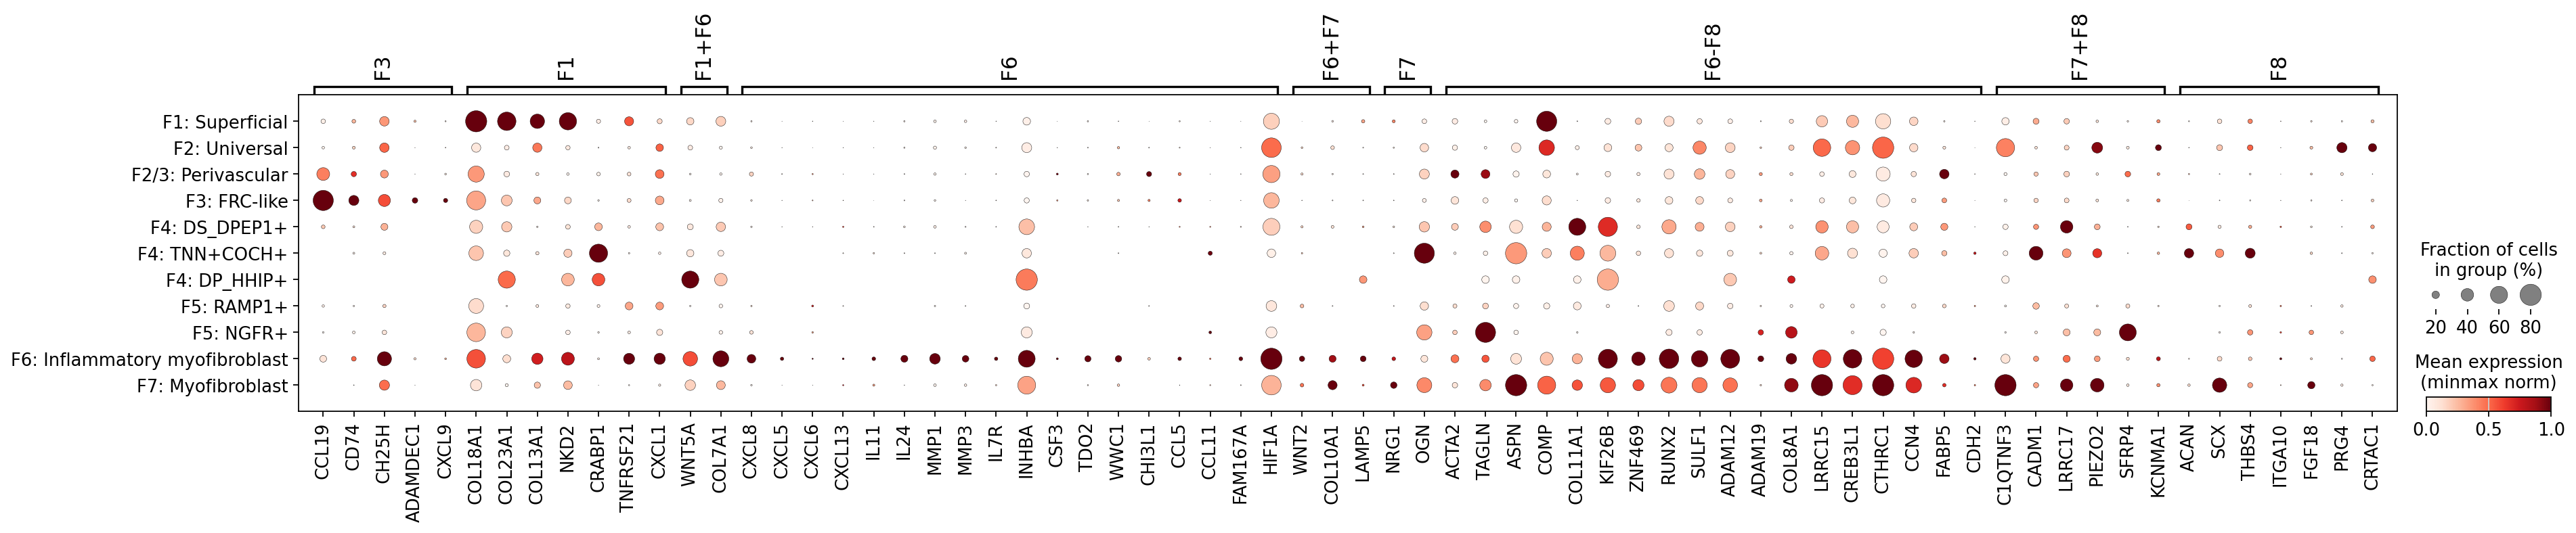

In [23]:
sc.pl.dotplot(
    adata,
    reynolds_short_final,
    groupby="cell_type_pred",
    vmax=1.0, standard_scale="var",
    colorbar_title='Mean expression\n(minmax norm)', 
    dendrogram=False, dot_max=0.8,
    categories_order = NEW_ORDER,
    save="supp4c_dotplot1.pdf"
   # save="fig3c_overalldotplot.pdf"
    
) 


sc.pl.dotplot(
    adata,
    LESIONAL_GENES_VSHORT5,
    groupby="cell_type_pred", 
        vmax=1.0, standard_scale="var",

   # vmax=1.1,
    colorbar_title='Mean expression\n(minmax norm)', 
    dendrogram=False,
        categories_order = NEW_ORDER,
    dot_max=0.8,
        save="supp4c_dotplot2.pdf"


) 
 

NameError: name 'stop' is not defined

In [ ]:
adata=sc.read_h5ad('/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_scvi_integration_all_forsupp4.h5ad')




In [ ]:
import gc
gc.collect()

In [ ]:
adata.X[:8,:8].A

In [ ]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(18,18))

sc.pl.umap(
    adata,
    color='test12',
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=15,
    s=20,
    title='',
    legend_fontoutline=2,
    save="supplementary4a1.pdf"
)

sc.pl.umap(
    adata,
    color='test12',
    show=True,
    frameon=False,
    #legend_loc= "on data",
    legend_fontsize=15,
    s=20,
    title='',
    legend_fontoutline=2,
    save="supplementary4a2.pdf"
)


In [ ]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(3, 3))

sc.pl.umap(
    adata,
    color=['CXCL13',"CXCL5", "IL7R", "MMP1"],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=5,
vmax="p99",
ncols=4,
cmap="Reds",
    s=5,
    #title='',
    legend_fontoutline=2,
    save="supplementary4b_f6.pdf"
)

 

In [ ]:
sc.pl.umap(
    adata,
    color=['NRG1',"OGN", ],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=5,
vmax="p99",
ncols=2,
cmap="Reds",
    s=5,
    #title='',
    legend_fontoutline=2,
    save="supplementary4b_f7.pdf"
)

 

In [ ]:
sc.pl.umap(
    adata,
    color=['SCX',"ACAN", "KCNMA1", "LRRC17"],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=5,
vmax="p99",
ncols=4,
cmap="Reds",
    s=5,
    #title='',
    legend_fontoutline=2,
    save="supplementary4b_f78.pdf"
)

 

In [22]:
0

0